# Decision Tree and Random Forest Classifiers
---
In this tutorial, we will understand how to implement a Decision Tree classifier and a Random Forest classifier to perform classification tasks. We will use both the classifiers to perform a binary classification task (i.e., 2 possible outcomes for the target label) and then compare their performance.

## Importing Project Dependencies
---
Let us begin the project by importing the necessary modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree # for plotting the decision tree

## Importing the Dataset
---
For this tutorial, we will be working on a dataset that contains several parameters which are considered important during the application for Masters Programs. The aim here is to predict whether an applicant will get accepted into the university or not. For this, we are considering the threshold for selection to be 0.85.

The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose ( out of 5)
* Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OneStep-elecTRON/ContentSection/main/Datasets/university_admissions.csv') # readin the csv file
df.columns = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'] # modifying column names
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Now, let us add the __Accepted__ column to our dataframe based on the 85% Chance of Admit criteria.

In [3]:
df['Accepted'] = df['Chance of Admit'].apply(lambda x: 1 if x >= 0.85 else 0) # creating Accepted column on the basis of 0.85 Chance of admit threshold
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Accepted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


## Data Wrangling & EDA
---
For the first step in cleaning our data, first we will drop the __Serial No.__ column, then see if the data needs any further cleaning or preprocessing.

In [4]:
df.drop(columns = ['Serial No.'], axis = 1, inplace = True) # dropping the Serial No. column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
 8   Accepted           500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


As we can see, there are no null values within our dataset. Let us now observe the correlation heatmap of our dataset.

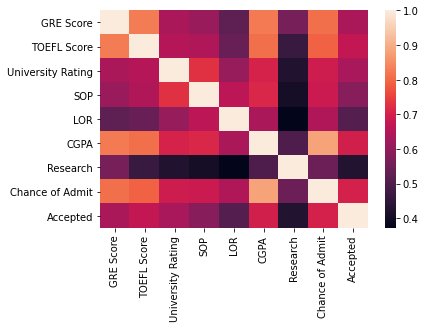

In [5]:
sns.heatmap(df.corr())

As we can see here, all the columns show an average correlation w.r.t. our target variable. Thus, we will be using all the columns as the feature variables for training our classifiers.

Let us have a look at the statistical analysis of our data.

In [6]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Accepted
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,0.218000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.413301
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,0.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,1.000000


As we can see here, the values within our dataset vary within the range \[1e+2, 1e0]. This might cause a data imbalance while training the model which can result in one feature affecting the final output more than the other feature variables. To tackle this imbalance, we will have to standardize the values within our dataset.

In [7]:
from sklearn.preprocessing import StandardScaler

X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] # selecting the features

scaler = StandardScaler() # creating StandardScaler class object
X_scaled = scaler.fit_transform(X) # performing standardization on X
X_scaled

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

Now, before we train the model, let us split our dataset into training and test sets.

In [8]:
from sklearn.model_selection import train_test_split # importing train_test_split method

y = df['Accepted'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape[0], X_test.shape[0] # printing the number of values in the test and training set

(400, 100)

With this, we are done pre-processing and exploring our data. In the next step, we will create and train our classifiers.

## Modeling- Decision Tree Classifier
---
In this section, we will see how to implement a simple decision tree, and then how to apply different hyperparameter optimization and regularization techniques to improve the performance of our classifier.

In [9]:
# Step 1- Importing the DecisionTreeClassifier class from sklearn
from sklearn.tree import DecisionTreeClassifier

# Step 2- Creating the decision tree model object
decisionTree = DecisionTreeClassifier() 

# Step 3- Fitting the model with our data
decisionTree.fit(X_train, y_train)

# Step 4- Generating labels based on the decision tree model predictions
y_predicted = decisionTree.predict(X_test)

With this, we have completed training our model and also generated the predictions for our test data. Before we move on to calculating the accuracy of our model, let us first visualize our tree.

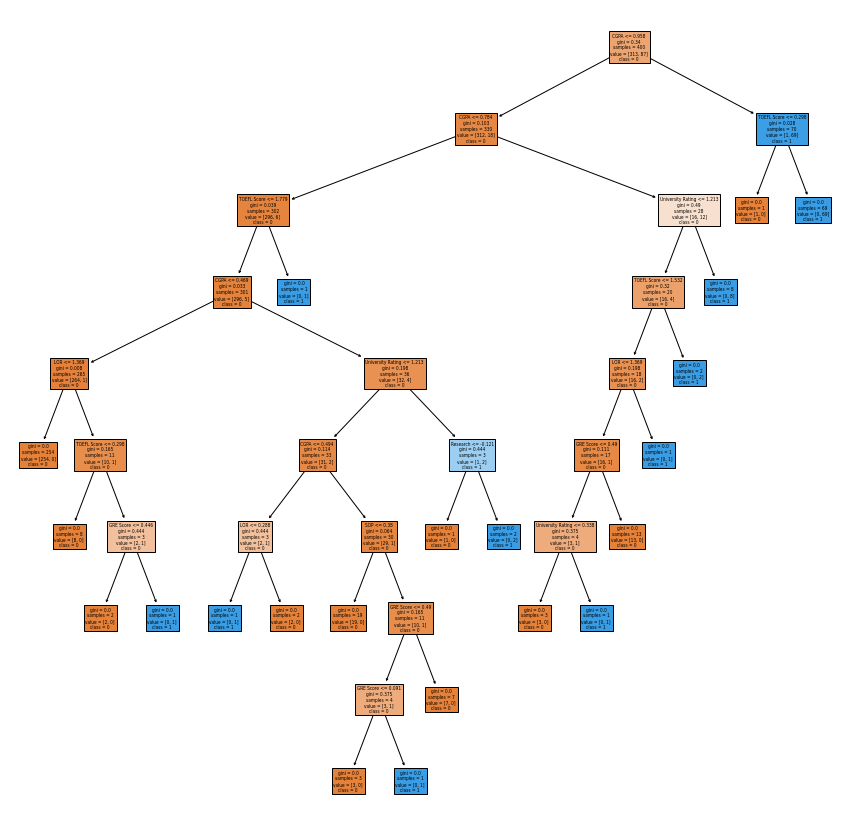

In [10]:
# visualizing the decision tree
fig = plt.figure(figsize=(15,15))
_ = plot_tree(decisionTree, feature_names=X.columns, class_names=np.unique(y_train.astype('str')), filled=True)

As we can see, the depth of our decision tree is 9. You can double-click and zoom on the image to see in detail the criteria the classifier used for splitting at each node within the tree. 

Now, for the next step, let us have a look at the accuracy of our classifier. For the accuracy measure, we will be preferring the F1-score here.

F1 score lies in the range \[0,1], with a F1 score of 1 denoting 0 false negative and false positive values. It gives us a rough idea of how many wrong predictions the model made.

In [11]:
# Step 1- Importing the metrics functions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score

# Step 2- Printing the F1 score
print("F1 Score = ", f1_score(y_test, y_predicted), end="\n")

# Step 3- Printing precision, recall, accuracy and other metrics
pd.DataFrame(classification_report(y_test, y_predicted, output_dict = True))

F1 Score =  0.9333333333333332


,0,1,accuracy,macro avg,weighted avg
precision,0.987013,0.913043,0.97,0.950028,0.970740
recall,0.974359,0.954545,0.97,0.964452,0.970000
f1-score,0.980645,0.933333,0.97,0.956989,0.970237
support,78.000000,22.000000,0.97,100.000000,100.000000


As we can see, we got an initial accuracy of 97% and an F1 score of 93.33 (for class '1'). 

Now, let us see how we can improve our model's performance. Here, we are going to use a regularization technique called __Pruning__. What we basically do in pruning is that we restrict the depth of the tree. This prevents the model from overfitting on the training data (the deeper a decision tree, the higher the chances of overfitting). 

We will train different decision trees with varying depths and then select the one with the highest F1 score as our final Decision Tree Classifier. 

In [12]:
f1_score_list = []
accuracy_score_list = []
# calculating f1 scores for decision trees with different depths 
for depth in range(3,10):
    tree = DecisionTreeClassifier(max_depth = depth) 
    tree.fit(X_train, y_train)
    y_predicted = tree.predict(X_test)
    f1 = f1_score(y_test, y_predicted)
    acc = accuracy_score(y_test, y_predicted)
    f1_score_list.append(f1)
    accuracy_score_list.append(acc)   


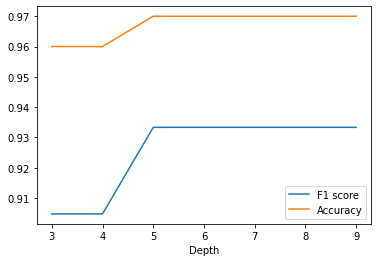

In [13]:
depth_values = [depth for depth in range(3,10)]

# plotting f1 scores for different tree depths
plt.plot(depth_values, f1_score_list)
plt.plot(depth_values, accuracy_score_list)
plt.legend(["F1 score", "Accuracy"], loc ="lower right")
plt.xlabel('Depth')
plt.show()

As we can see from the above graph, the best accuracy and F1 score that our decision tree classifiers achieved is 0.97 and 0.93 (same as without regularization). However, we can achieve the same result with a depth of 5 (less complex model architecture should be preferred whenever possible over a more complex one). So we will train our final model with a max depth of 5 and visuallize our decision tree classifier. 

NOTE- This time, since we will be training the final model, we will train it on the entire dataset instead of only the training set.

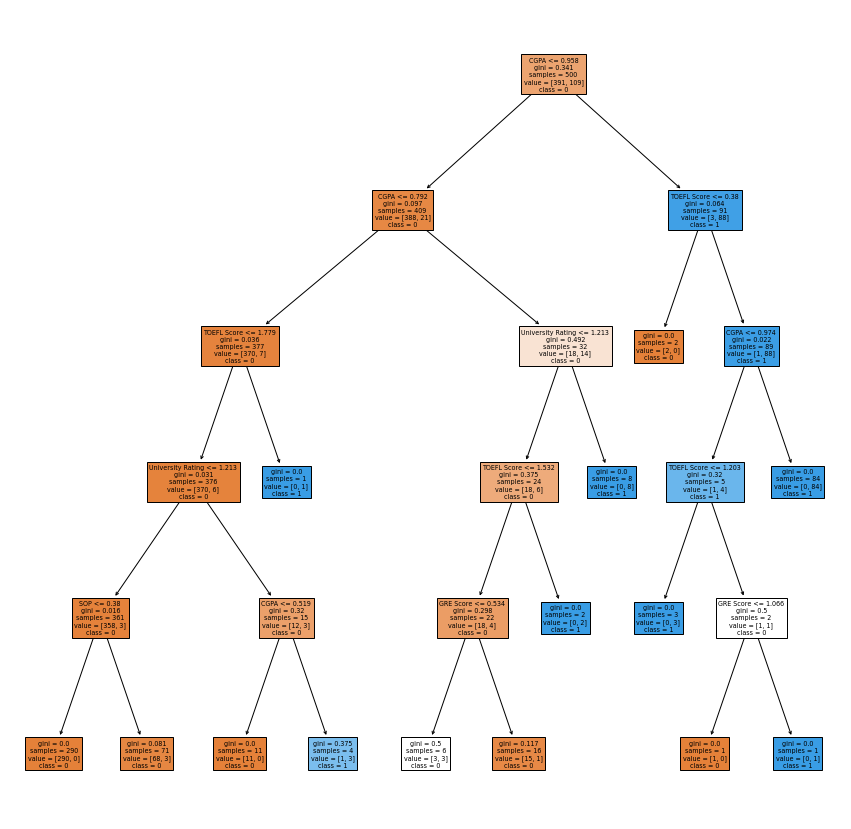

In [14]:
# training the tree with max_depth = 5
decisionTree = DecisionTreeClassifier(max_depth = 5) 
decisionTree.fit(X_scaled, y)

# visualizing the decision tree
fig = plt.figure(figsize=(15,15))
_ = plot_tree(decisionTree, feature_names=X.columns, class_names=np.unique(y_train.astype('str')), filled=True)

## Modeling- Random Forest Classifier
---
In this section, we will create and train our Random Forest Classifier model.

In [15]:
# Step 1- Importing the RandomForestClassifier class from sklearn
from sklearn.ensemble import RandomForestClassifier

# Step 2- Creating the decision tree model object
forest = RandomForestClassifier() 

# Step 3- Fitting the model with our data
forest.fit(X_train, y_train)

# Step 4- Generating labels based on the decision tree model predictions
y_predicted = forest.predict(X_test)

Now, let us check the accuracy metrics for our forest classifier model.

In [16]:
# Step 1- Printing the F1 score
print("F1 Score = ", f1_score(y_test, y_predicted), end="\n")

# Step 2- Printing precision, recall, accuracy and other metrics
pd.DataFrame(classification_report(y_test, y_predicted, output_dict = True))

F1 Score =  0.9302325581395349


,0,1,accuracy,macro avg,weighted avg
precision,0.974684,0.952381,0.97,0.963532,0.969777
recall,0.987179,0.909091,0.97,0.948135,0.970000
f1-score,0.980892,0.930233,0.97,0.955562,0.969747
support,78.000000,22.000000,0.97,100.000000,100.000000


As we can see, with an F1 score of 0.85 and an accuracy of 0.94, our Random Forest Classifier is initially performing worse as compared to the decision tree. Now, let us tweak a few hyperparameters and retrain another classifier. For this, we will be using GridSearchCV that you learned about earlier. The hyperparameters we will be experimenting with are-
* max_depth: Denotes the maximum depths of the decision trees in the forest
* n_estimators: Number of trees used within the forest

In [17]:
from sklearn.model_selection import GridSearchCV

# setting the parameters to be tested
max_depths = range(3,10,2) 
n_estimators_list = range(10,101,10)
parameters = {'max_depth': max_depths, 'n_estimators': n_estimators_list}

# getting the best parameters using the grid search CV
forest = RandomForestClassifier()
clf = GridSearchCV(forest, parameters, scoring = 'f1', cv = 5)
clf.fit(X_scaled, y)
print('Best hyperparameters are: ', clf.best_params_)

Best hyperparameters are:  {'max_depth': 7, 'n_estimators': 10}


Now, let us train our final Random Forest Classifier with the derived best parameters then we will compare its performance against the 0.93 F1 score of the Decision Tree Classifier.

In [18]:
# training the final forest model
forest = RandomForestClassifier(max_depth = 7, n_estimators = 40) 
forest.fit(X_train, y_train)
y_predicted = forest.predict(X_test)

# Step 1- Printing the F1 score
print("F1 Score = ", f1_score(y_test, y_predicted), end="\n")

F1 Score =  0.8837209302325582


As we can see, the F1 score achieved by our Random Forest Classifier is only around 0.9 as compared to the 0.93 of the Decision Tree Classifier. Hence, it is not necessary that using a more complex model architecture will get us a better score. 

With this, we come to an end of this tutorial. There was a lot to understand in this tutorial. So I'd definitely advice you to go through all the concepts once again before proceeding any further.